# Data Wrangling

### Data Exploration and cleaning

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
from library.sb_utils import save_file

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data = pd.read_csv('data/LoanStats_2015_subset.csv')

This data is all about financial processes of individual people. The file named `LCDataDictionary.xlsx` contains detailed information about each column. 

Let's now explore the data and understand it:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 105 entries, acc_now_delinq to sec_app_mths_since_last_major_derog
dtypes: float64(85), object(20)
memory usage: 337.3+ MB


There are 105 columns in total, 85 of which are of float type and the rest 20 are of object type. 

In [4]:
data.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 421097 rows in total, i. e. so many clients with their personal and financial information. There are 105 columns in this table and each column contains some sort of information about the clients. We will try to see if any of these columns and rows contain any missing values.

In [5]:
data.isna().any().any()

True

In [6]:
# Let's see if there are any duplicate rows
duplicate = data[data.duplicated()]
duplicate

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog


Since the data is large and we have too many columns (pandas cannot display all columns), we can explore the columns in parts:

In [7]:
data.iloc[:,0:50].info() # first 50 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   acc_now_delinq                  421095 non-null  float64
 1   acc_open_past_24mths            421095 non-null  float64
 2   addr_state                      421095 non-null  object 
 3   all_util                        21372 non-null   float64
 4   annual_inc                      421095 non-null  float64
 5   annual_inc_joint                511 non-null     float64
 6   application_type                421095 non-null  object 
 7   avg_cur_bal                     421095 non-null  float64
 8   bc_open_to_buy                  417132 non-null  float64
 9   bc_util                         416868 non-null  float64
 10  chargeoff_within_12_mths        421095 non-null  float64
 11  collections_12_mths_ex_med      421095 non-null  float64
 12  delinq_2yrs     

In [8]:
data.iloc[:,50:105].info() # next 55 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   num_accts_ever_120_pd                421095 non-null  float64
 1   num_actv_bc_tl                       421095 non-null  float64
 2   num_actv_rev_tl                      421095 non-null  float64
 3   num_bc_sats                          421095 non-null  float64
 4   num_bc_tl                            421095 non-null  float64
 5   num_il_tl                            421095 non-null  float64
 6   num_op_rev_tl                        421095 non-null  float64
 7   num_rev_accts                        421094 non-null  float64
 8   num_rev_tl_bal_gt_0                  421095 non-null  float64
 9   num_sats                             421095 non-null  float64
 10  num_tl_120dpd_2m                     401865 non-null  float64
 11  num_tl_30dpd 

We can see that some of the columns have no information at all and some contain very few information (less than 1000 rows), so we may actually drop them. Before dropping, I looked at the description of the columns with fewer than 1000 rows of information in the documentation and verified that those columns do not contain any useful information which could be used for our future model. This again justifies our reason to drop those columns.

In [9]:
data.dropna(axis='columns', how='any', thresh=1000, inplace=True)

In [10]:
data.shape

(421097, 89)

We got rid of 16 columns, which makes our further analysis a bit simpler.

Let's look at the columns with an object type of data:

In [11]:
data.select_dtypes(include=['object']).head()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,int_rate,issue_d,loan_status,purpose,revol_util,sub_grade,term,title,verification_status,zip_code
0,KS,Individual,Nov-2003,10+ years,Teacher,B,MORTGAGE,w,9.80%,Dec-2015,Fully Paid,debt_consolidation,13.4%,B3,60 months,Debt consolidation,Not Verified,660xx
1,VT,Individual,Feb-1996,1 year,Director,A,MORTGAGE,w,5.32%,Dec-2015,Current,credit_card,42.5%,A1,36 months,Credit card refinancing,Not Verified,054xx
2,IN,Individual,Oct-2002,10+ years,Engineer,D,MORTGAGE,w,18.49%,Dec-2015,Current,debt_consolidation,51.9%,D5,60 months,Debt consolidation,Verified,471xx
3,OH,Individual,Aug-1997,2 years,Vice-President,D,MORTGAGE,w,15.77%,Dec-2015,Fully Paid,home_improvement,50.3%,D1,36 months,Home improvement,Not Verified,430xx
4,FL,Individual,Jun-2006,< 1 year,RN,E,RENT,w,19.89%,Dec-2015,Current,credit_card,102.4%,E3,60 months,NaN,Verified,322xx


We can see that some of the columns actually contain date, so they could be converted to a datetime object (if needed). The columns with a percentage sign can be converted to a float type by dropping the percentage sign. Some of the columns can be converted to an integer type as well. Also, we can see that some of the columns contain information about state and zip code of the clients. Those columns may potentially be dropped, because the state and zip code of a person is not very strongly correlated with the loan information of a person. All these and more details will be explored in future steps, for now we just wanted to look at those object type columns and try to understand their underlying structure. So these columns could potentially be converted to a useful type, integer or float, or just be dropped due to their irrelevant characteristics. 

Let's now count the number of missing values in each column of the rest of the data and sort them.

In [12]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['missing_count', 'missing_%']
missing.sort_values(by=['missing_count', 'missing_%'], ascending=False).head(30)

,missing_count,missing_%
il_util,402480,95.578928
mths_since_rcnt_il,400287,95.058146
all_util,399725,94.924685
inq_fi,399725,94.924685
inq_last_12m,399725,94.924685
max_bal_bc,399725,94.924685
open_acc_6m,399725,94.924685
open_il_12m,399725,94.924685
open_il_24m,399725,94.924685
open_act_il,399725,94.924685


If we look carefully, we can see that some columns contain 399725 or more missing values. Let's see if these missing values and the rest non-null values are correlated, i .e. let's see if the missing and non-missing values are for the same rows.

In [13]:
# You might want to run the following line to install the missingno package first
# conda install -c conda-forge/label/gcc7 missingno

In [14]:
import missingno as msno
%matplotlib inline

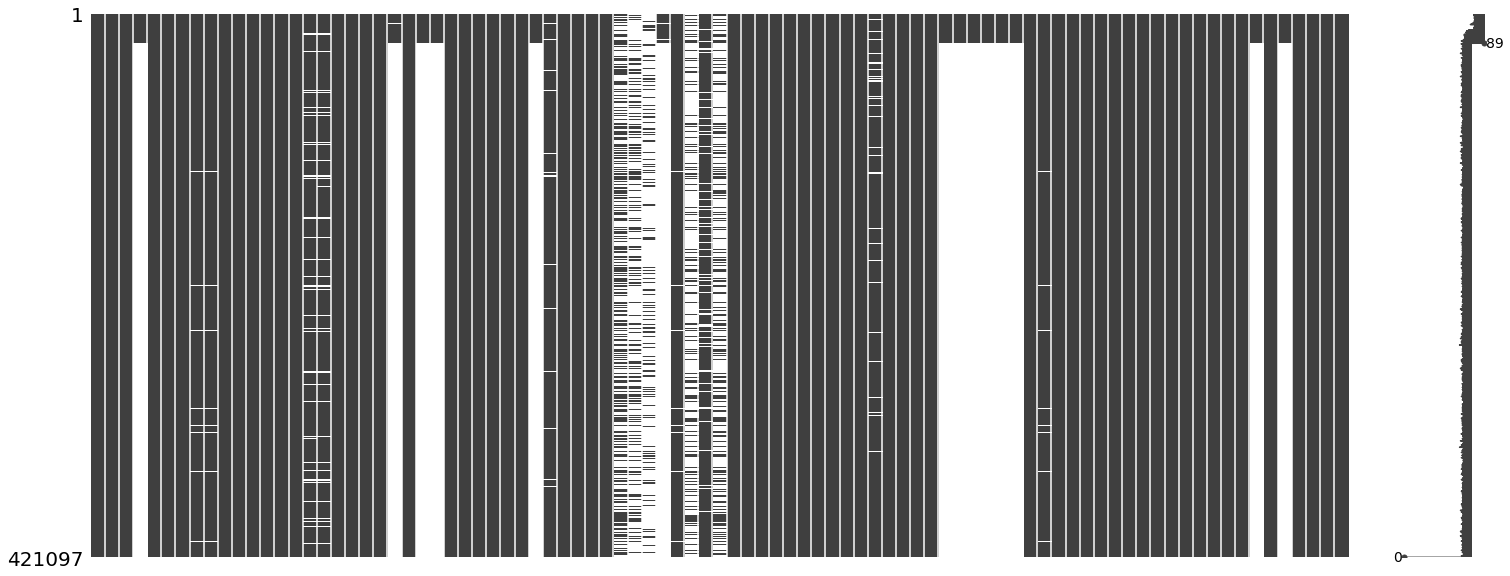

In [15]:
msno.matrix(data)
plt.show()

We can already see that some of the columns have missing values for the same rows.

Let's explore this in more details and obtain the names of the columns, so that we can plot them separately and see the correlations in more details.

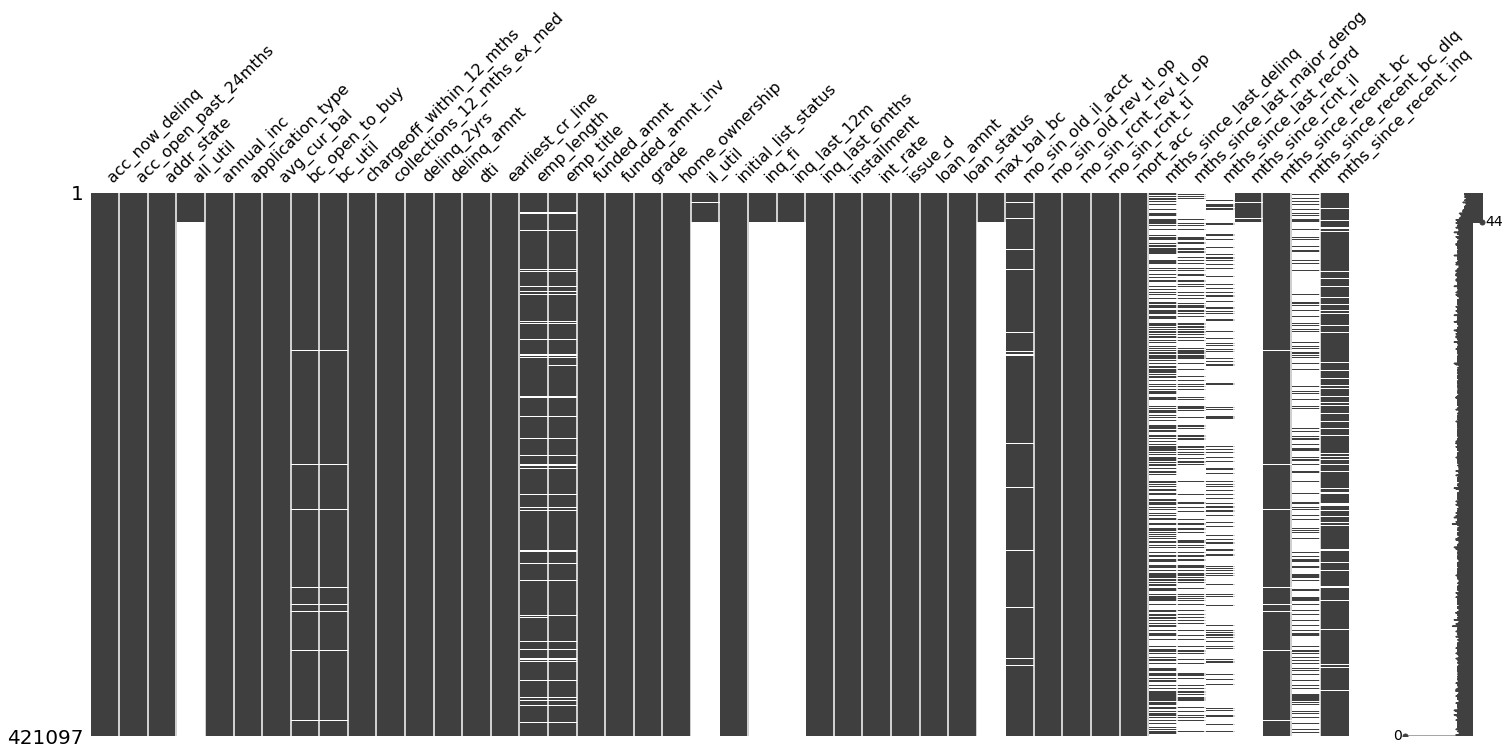

In [16]:
msno.matrix(data.iloc[:,0:44])
plt.show()

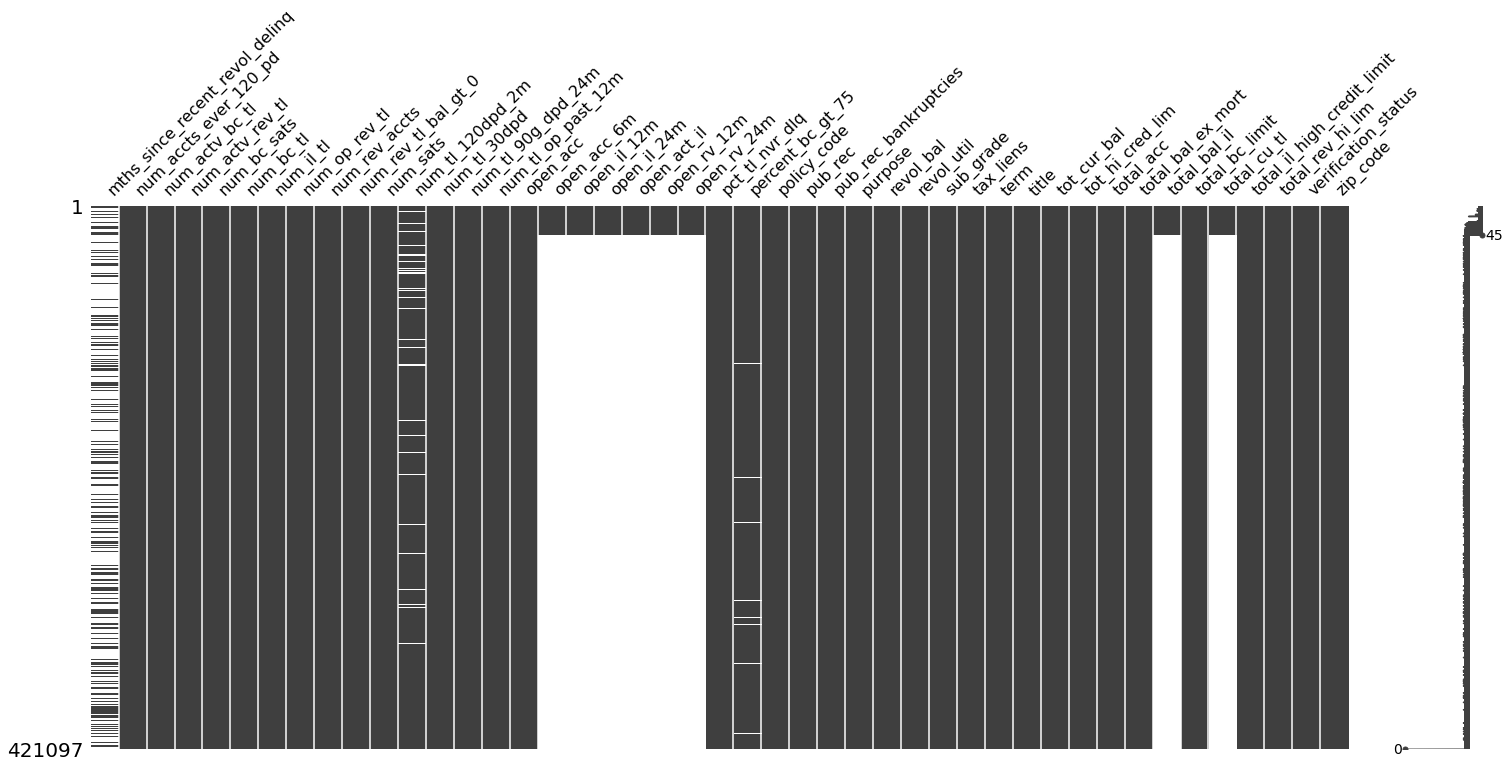

In [17]:
msno.matrix(data.iloc[:,44:89])
plt.show()

Now that we can see more details about those columns, let's separate them out from the rest of the data and see their correlations (These columns could also be seen from our missing value count table, they make the first 14 columns, each of which contain about 95% of missing values):

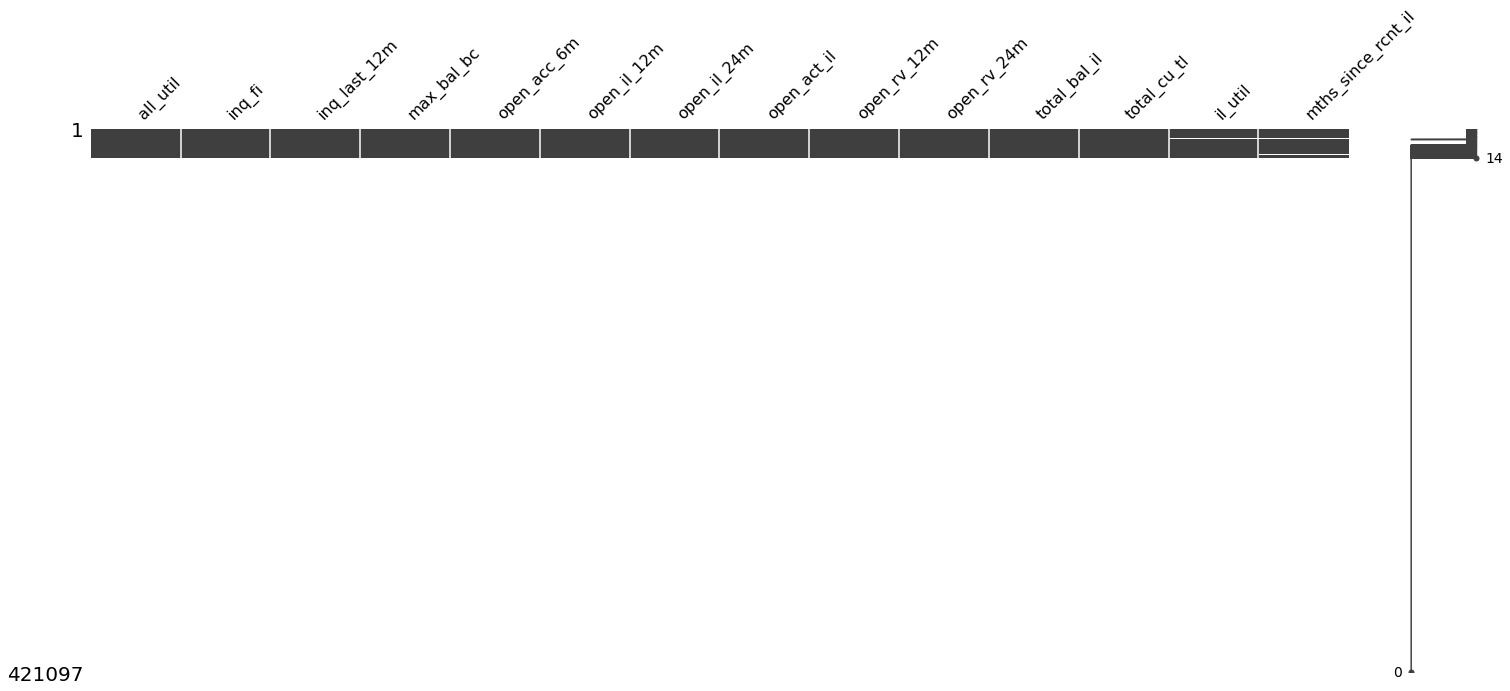

In [18]:
msno.matrix(data[['all_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'open_acc_6m',
                  'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 
                  'total_bal_il', 'total_cu_tl', 'il_util', 'mths_since_rcnt_il']])
plt.show()

Let's also take a look at the heatmap to see the correlation among the non-missing values:

<AxesSubplot:>

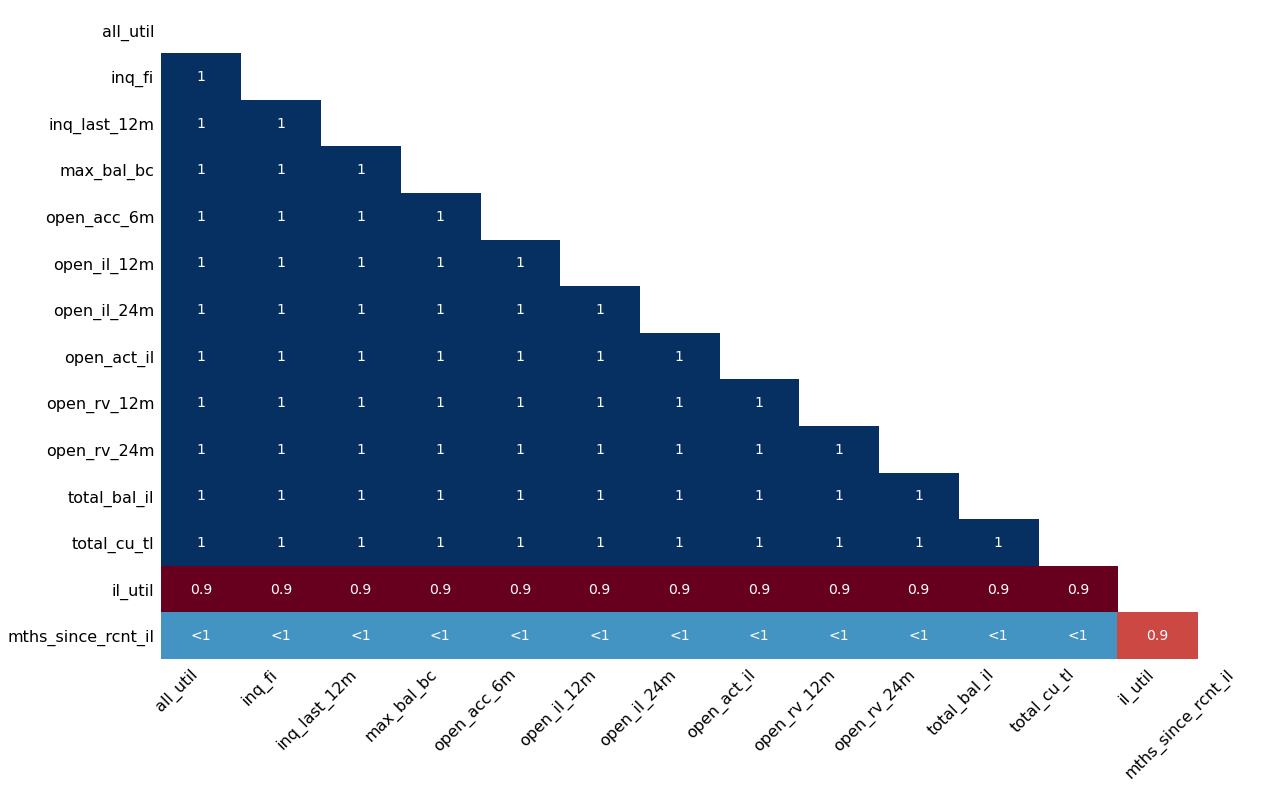

In [19]:
msno.heatmap(data[['all_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'open_acc_6m',
                      'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m',
                      'total_bal_il', 'total_cu_tl', 'il_util', 'mths_since_rcnt_il']])
# sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

From this we can see that all the non-null values of these selected columns are strongly correlated, and they appear only at the top of the above charts. This suggests that either this data was collected from a separate source or it was joined from a different table. We should note that this data (around 20,000 rows) contains about 5% of the whole data set. For that reason, we can just drop these columns.

In [20]:
data.drop(['all_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'open_acc_6m',
                  'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 
                  'open_rv_24m','total_bal_il', 'total_cu_tl', 'il_util', 
                  'mths_since_rcnt_il'], axis=1, inplace=True)

In [21]:
# Let's look at the end of the dataset
data.tail()

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,...,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code
421092,0.0,6.0,MA,64400.0,Individual,3895.0,3752.0,61.3,0.0,1.0,...,Debt consolidation,58418.0,96919.0,20.0,58418.0,9700.0,69919.0,27000.0,Source Verified,010xx
421093,0.0,7.0,TN,35000.0,Individual,3798.0,2554.0,75.9,0.0,0.0,...,Debt consolidation,34178.0,51239.0,22.0,34178.0,10600.0,33239.0,18000.0,Verified,378xx
421094,0.0,1.0,FL,100000.0,Individual,4163.0,8434.0,79.8,0.0,0.0,...,Credit card refinancing,33307.0,43740.0,10.0,33307.0,41700.0,0.0,41700.0,Verified,331xx
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#data.tail(2).info()

Last two rows have no data, let's drop those two rows:

In [23]:
data.drop(data.tail(2).index,inplace = True)

Let's now look at the other columns which have significant amount of missing values and also have names that count the number of months:

In [24]:
data[['mths_since_last_record', 'mths_since_recent_bc_dlq', 
      'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 
      'mths_since_last_delinq', 'mths_since_recent_inq', 'mths_since_recent_bc']].head(5)

,mths_since_last_record,mths_since_recent_bc_dlq,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_last_delinq,mths_since_recent_inq,mths_since_recent_bc
0,NaN,NaN,NaN,NaN,NaN,14.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,73.0
2,NaN,NaN,NaN,NaN,NaN,16.0,10.0
3,NaN,NaN,NaN,61.0,61.0,0.0,16.0
4,NaN,NaN,NaN,NaN,NaN,NaN,25.0


The documentation of the dataset gives the following definitions of these columns:

* `mths_since_last_record`	       The number of months since the last public record.
* `mths_since_recent_bc_dlq`	   Months since most recent bankcard delinquency
* `mths_since_last_major_derog`	   Months since most recent 90-day or worse rating
* `mths_since_recent_revol_delinq` Months since most recent revolving delinquency.
* `mths_since_last_delinq`	       The number of months since the borrower's last delinquency.
* `mths_since_recent_inq`	       Months since most recent inquiry. 
*  `mths_since_recent_bc`	       Months since most recent bankcard account opened.

From this we can see that perhaps the missing values are meant to be zero. Because not every account becomes delinquent or a subject of public record and so. We will just follow the presumtion of innocence and assume that "everyone is innocent until proven guilty". So let's replace all the NaN values with zeros and see if that works for our predictive model.  

In [25]:
data[['mths_since_last_record', 'mths_since_recent_bc_dlq', 
      'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 
      'mths_since_last_delinq', 'mths_since_recent_inq', 
      'mths_since_recent_bc']] = data[['mths_since_last_record', 'mths_since_recent_bc_dlq', 
      'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 
      'mths_since_last_delinq', 'mths_since_recent_inq', 
      'mths_since_recent_bc']].fillna(value=0)

Let's look at the rest of the columns with missing values:

In [26]:
data[['emp_title','emp_length','num_tl_120dpd_2m','mo_sin_old_il_acct','percent_bc_gt_75',
      'bc_util','bc_open_to_buy','revol_util','title']].head()

,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,percent_bc_gt_75,bc_util,bc_open_to_buy,revol_util,title
0,Teacher,10+ years,0.0,127.0,0.0,17.1,41055.0,13.4%,Debt consolidation
1,Director,1 year,0.0,166.0,0.0,44.0,24661.0,42.5%,Credit card refinancing
2,Engineer,10+ years,0.0,143.0,50.0,59.9,23476.0,51.9%,Debt consolidation
3,Vice-President,2 years,0.0,118.0,33.3,50.3,21569.0,50.3%,Home improvement
4,RN,< 1 year,0.0,112.0,100.0,102.4,0.0,102.4%,NaN


We can see that some of these columns with missing values are also of object type. We may first look at the content of the data itself and decide whether we need those columns or not, and if we decide to keep any columns, we can then fill up the missing values and/or change the data type. Let's now look at the object type data again and see if we need to drop any irrelevant columns.

In [27]:
data.select_dtypes(include=['object']).head()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,int_rate,issue_d,loan_status,purpose,revol_util,sub_grade,term,title,verification_status,zip_code
0,KS,Individual,Nov-2003,10+ years,Teacher,B,MORTGAGE,w,9.80%,Dec-2015,Fully Paid,debt_consolidation,13.4%,B3,60 months,Debt consolidation,Not Verified,660xx
1,VT,Individual,Feb-1996,1 year,Director,A,MORTGAGE,w,5.32%,Dec-2015,Current,credit_card,42.5%,A1,36 months,Credit card refinancing,Not Verified,054xx
2,IN,Individual,Oct-2002,10+ years,Engineer,D,MORTGAGE,w,18.49%,Dec-2015,Current,debt_consolidation,51.9%,D5,60 months,Debt consolidation,Verified,471xx
3,OH,Individual,Aug-1997,2 years,Vice-President,D,MORTGAGE,w,15.77%,Dec-2015,Fully Paid,home_improvement,50.3%,D1,36 months,Home improvement,Not Verified,430xx
4,FL,Individual,Jun-2006,< 1 year,RN,E,RENT,w,19.89%,Dec-2015,Current,credit_card,102.4%,E3,60 months,NaN,Verified,322xx


In [28]:
#data['title'].unique()
#data['title'].value_counts()

After some careful review, I decided that `addr_state`, `application_type`, `emp_title` (employment title), `title`, and `zip_code` may not be directly relevant to our task. We are also not sure how to actually quantify some of these columns, so for the simplicity of our model we will just drop those columns. 

In [29]:
data = data.drop(['addr_state', 'application_type', 'emp_title', 'title', 'zip_code'], axis=1)

In [30]:
data.info() # you can run this code if you want to see some details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   acc_now_delinq                  421095 non-null  float64
 1   acc_open_past_24mths            421095 non-null  float64
 2   annual_inc                      421095 non-null  float64
 3   avg_cur_bal                     421095 non-null  float64
 4   bc_open_to_buy                  417132 non-null  float64
 5   bc_util                         416868 non-null  float64
 6   chargeoff_within_12_mths        421095 non-null  float64
 7   collections_12_mths_ex_med      421095 non-null  float64
 8   delinq_2yrs                     421095 non-null  float64
 9   delinq_amnt                     421095 non-null  float64
 10  dti                             421093 non-null  float64
 11  earliest_cr_line                421095 non-null  object 
 12  emp_length      

Let's explore the rest of the dataset with null values:

In [31]:
subset_df = data.loc[:, data.isnull().any()] # columns with null values
#subset_df
nan_values = subset_df[subset_df.isna().any(axis=1)] # rows and columns with null values
nan_values.head()

,bc_open_to_buy,bc_util,dti,emp_length,mo_sin_old_il_acct,num_rev_accts,num_tl_120dpd_2m,percent_bc_gt_75,revol_util
51,NaN,NaN,6.52,6 years,167.0,4.0,0.0,NaN,56.3%
69,8818.0,27.7,16.11,NaN,123.0,25.0,0.0,0.0,21.2%
71,27172.0,10.9,10.24,NaN,139.0,13.0,0.0,0.0,10.3%
78,20142.0,32.2,8.43,8 years,NaN,22.0,0.0,12.5,26.7%
97,347.0,96.6,10.17,1 year,NaN,9.0,0.0,100.0,75.3%


We see that some of the rows and columns still contain null values. Let's try to understand these columns and see if we can replace all those null values with something else, for example with zero. If that's not possible to do under the context, we will then just drop all the rows with null values. 

The documentation of the dataset gives the following definitions for these columns:

* `bc_open_to_buy` - Total open to buy on revolving bankcards.
* `bc_util` - Ratio of total current balance to high credit/credit limit for all bankcard accounts.
* `dti` - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* `emp_length` - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
* `mo_sin_old_il_acct` - Months since oldest bank installment account opened.
* `num_rev_accts` - Number of revolving accounts. 
* `num_tl_120dpd_2m` - Number of accounts currently 120 days past due (updated in past 2 months)
* `percent_bc_gt_75` - Percentage of all bankcard accounts > 75% of limit.
* `revol_util` - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Let's now explore each of these columns one by one and try to convert them to an integer or float type data.

In [32]:
data['bc_open_to_buy'].isna().sum()

3963

In [33]:
len(data[data['bc_open_to_buy']==0]['bc_open_to_buy'])

8526

Since the value of zero is part of this column, maybe we can replace all the missing values with zeros. 

In [34]:
data['bc_open_to_buy'] = data['bc_open_to_buy'].fillna(value=0)

We will perform similar analysis of the other columns and fill the missing values appropriately:

In [35]:
data['bc_util'] = data['bc_util'].fillna(value=0)

In [36]:
data['dti'] = data['dti'].fillna(value=0)

In [37]:
data['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '< 1 year', '8 years', '5 years',
       '3 years', '9 years', '7 years', '4 years', '6 years', nan],
      dtype=object)

In [38]:
#data['emp_length'] = data['emp_length'].replace({' years':''}, {' year':''}, regex = True)
data['emp_length'] = data['emp_length'].replace(regex={' years': '', ' year': ''})

In [39]:
data['emp_length'] = data['emp_length'].replace(['10+', '< 1'], ['10', '0'])

In [40]:
data['emp_length'] = data['emp_length'].fillna(value=0)

In [41]:
data['emp_length'].unique()

array(['10', '1', '2', '0', '8', '5', '3', '9', '7', '4', '6', 0],
      dtype=object)

In [42]:
data['emp_length'] = data['emp_length'].astype('int64')

In [43]:
#data['emp_length'] = data['emp_length'].astype("category")

In [44]:
data['mo_sin_old_il_acct'] = data['mo_sin_old_il_acct'].fillna(value=0)

In [45]:
data['num_rev_accts'] = data['num_rev_accts'].fillna(value=0)

In [46]:
data['num_tl_120dpd_2m'] = data['num_tl_120dpd_2m'].fillna(value=0)

In [47]:
data['percent_bc_gt_75'] = data['percent_bc_gt_75'].fillna(value=0)

In [48]:
data['revol_util'] = data['revol_util'].replace({'%':''}, regex = True)

In [49]:
data['revol_util'] = data['revol_util'].astype('float64')

In [50]:
data['revol_util'] = data['revol_util'].fillna(value=0)

In [51]:
# data.select_dtypes(include=['object']).head(10)

In [52]:
# 'earliest_cr_line' can be converted to number of years of the existing credit line.
# We can extract the year part of this column and subtract it from 2015 
# (this dataset is from 2015)
data['earliest_cr_line'] = data['earliest_cr_line'].str.extract('(\d+)')
data['cr_line_years'] = 2015 - data['earliest_cr_line'].astype('int64')
data.drop(['earliest_cr_line'], axis=1, inplace = True)

In [53]:
#data['int_rate'] = data['int_rate'].str.extract('(\d+)') # need to divide by 100
data['int_rate'] = data['int_rate'].replace({'%':''}, regex = True)

In [54]:
data['int_rate'] = data['int_rate'].astype('float64')

In [55]:
data['term'] = data['term'].replace({' months':''}, regex = True).astype('int64')

In [56]:
data['verification_status'] = data['verification_status'].replace({'Source ':''},regex = True)

In [57]:
data['verification_status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

In [58]:
data.select_dtypes(include=['object']).head()

,grade,home_ownership,initial_list_status,issue_d,loan_status,purpose,sub_grade,verification_status
0,B,MORTGAGE,w,Dec-2015,Fully Paid,debt_consolidation,B3,Not Verified
1,A,MORTGAGE,w,Dec-2015,Current,credit_card,A1,Not Verified
2,D,MORTGAGE,w,Dec-2015,Current,debt_consolidation,D5,Verified
3,D,MORTGAGE,w,Dec-2015,Fully Paid,home_improvement,D1,Not Verified
4,E,RENT,w,Dec-2015,Current,credit_card,E3,Verified


The documentation of this dataset says that if `loan_status = {‘Charged Off’, ‘Default’}`, then the loan has charged off, otherwise it has not.

So this means that we can categorize the `loan_status` columns with binary values. We also decided to drop the `sub_grade` column which categorizes the `grade` column with even finer details. We think it is not that important to have so many different cateogries, and that the `grade` category which has 7 unique values is already enough for our puspose.

In [59]:
data = data.drop(['sub_grade'], axis=1)

In [60]:
data['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period', 'Default'], dtype=object)

In [61]:
data['loan_status'].replace({'Charged Off': 1, 'Default': 1, 'Fully Paid': 0, 'Current': 0,
                             'Late (16-30 days)': 0, 'Late (31-120 days)': 0, 
                             'In Grace Period': 0}, inplace=True)

In [62]:
data['loan_status'].unique()

array([0, 1])

In [63]:
data.select_dtypes(include=['object']).head()

,grade,home_ownership,initial_list_status,issue_d,purpose,verification_status
0,B,MORTGAGE,w,Dec-2015,debt_consolidation,Not Verified
1,A,MORTGAGE,w,Dec-2015,credit_card,Not Verified
2,D,MORTGAGE,w,Dec-2015,debt_consolidation,Verified
3,D,MORTGAGE,w,Dec-2015,home_improvement,Not Verified
4,E,RENT,w,Dec-2015,credit_card,Verified


In [64]:
# need to create categorical columns first
# pd.get_dummies(data, drop_first=False)

In [65]:
data[data.select_dtypes(['object']).columns] = \
data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [66]:
# data.select_dtypes(include=['category']).head()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   acc_now_delinq                  421095 non-null  float64 
 1   acc_open_past_24mths            421095 non-null  float64 
 2   annual_inc                      421095 non-null  float64 
 3   avg_cur_bal                     421095 non-null  float64 
 4   bc_open_to_buy                  421095 non-null  float64 
 5   bc_util                         421095 non-null  float64 
 6   chargeoff_within_12_mths        421095 non-null  float64 
 7   collections_12_mths_ex_med      421095 non-null  float64 
 8   delinq_2yrs                     421095 non-null  float64 
 9   delinq_amnt                     421095 non-null  float64 
 10  dti                             421095 non-null  float64 
 11  emp_length                      421095 non-null  int64   
 12  fu

In [68]:
#data.isna().any().any()

In [69]:
# save the data to a new csv file
datapath = 'data'
save_file(data, 'loan_data_cleaned_1.csv', datapath)

Writing file.  "data/loan_data_cleaned_1.csv"
